In [ ]:
import pandas as pd
import os
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import seaborn as sns
import pickle

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.getcwd())

/content


In [ ]:
data = pd.read_csv('./drive/MyDrive/Final/dataset.csv')

In [ ]:
data.describe()

,BreachYear,BreachCount
count,1134.000000,1.134000e+03
mean,2015.878307,2.295828e+07
std,3.745101,1.121235e+08
min,2004.000000,3.500000e+02
25%,2014.000000,2.517998e+05
50%,2016.000000,1.152909e+06
75%,2019.000000,7.089049e+06
max,2023.000000,3.000000e+09


In [ ]:
display(data)

,Name,Domain,BreachYear,BreachCount,ClassLabels
0,000webhost,000webhost.com,2015,13545468,high
1,17Media,17app.co,2016,4009640,high
2,AcneOrg,acne.org,2014,432943,low
3,Adobe,adobe.com,2013,152445165,high
4,AdultFriendFinder,adultfriendfinder.com,2015,3867997,medium
...,...,...,...,...,...
1129,Zurich,zurich.co.jp,2023,756737,medium
1130,Zynga,zynga.com,2019,172869660,high
1131,Parapa,parapa.mail.ru,2016,4946850,high
1132,SprashivaiRu,sprashivai.ru,2015,3474763,medium


In [ ]:
y = data.ClassLabels
le = LabelEncoder()
encoded_data = le.fit_transform(y)
y = encoded_data
print(y)

[0 0 1 ... 0 2 2]


In [ ]:
x = data.drop('ClassLabels',axis=1)
x = x.drop('BreachYear',axis=1)
x = x.drop('Name',axis=1)
print(x)

                     Domain  BreachCount
0            000webhost.com     13545468
1                  17app.co      4009640
2                  acne.org       432943
3                 adobe.com    152445165
4     adultfriendfinder.com      3867997
...                     ...          ...
1129           zurich.co.jp       756737
1130              zynga.com    172869660
1131         parapa.mail.ru      4946850
1132          sprashivai.ru      3474763
1133           ggumim.co.kr      1298651

[1134 rows x 2 columns]


In [ ]:
le = LabelEncoder()
x['Domain'] = le.fit_transform(x['Domain'])
print(x)

      Domain  BreachCount
0          0     13545468
1          5      4009640
2         26       432943
3         30    152445165
4         33      3867997
...      ...          ...
1129     914       756737
1130     915    172869660
1131     600      4946850
1132     730      3474763
1133     336      1298651

[1134 rows x 2 columns]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_test)

      Domain  BreachCount
849      517       396533
254      326       800000
649      239      6486626
156       55      1220000
262      355       808000
...      ...          ...
909      606      3395101
668      269       655161
1068     834      4775203
433      814        63000
202      182        40000

[227 rows x 2 columns]


In [ ]:
print("shape of original dataset :", data.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (1134, 5)
shape of input - training set (907, 2)
shape of output - training set (907,)
shape of input - testing set (227, 2)
shape of output - testing set (227,)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


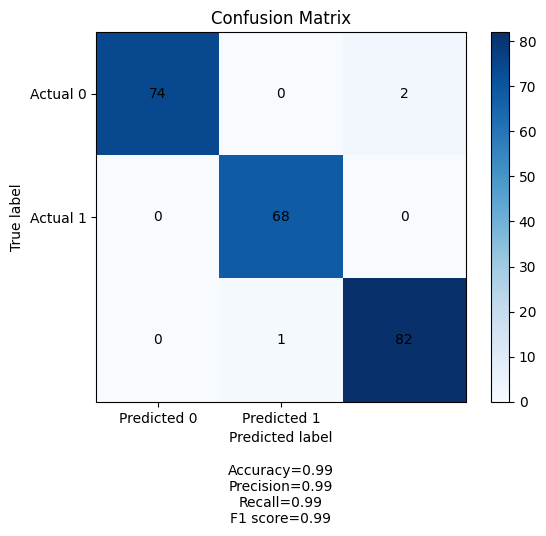

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
cm = confusion_matrix(y_test, y_pred)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='positive',average='micro')
recall = recall_score(y_test, y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test, y_pred,pos_label='positive',average='micro')

# print("Precision Score : ",precision_score(y_test, y_pred, 
#                                            pos_label='positive',
#                                            average='micro'))
# print("Recall Score : ",recall_score(y_test, y_pred, 
#                                            pos_label='positive',
#                                            average='micro'))

# Plot confusion matrix with values and labels
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label\n\nAccuracy={:.2f}\nPrecision={:.2f}\nRecall={:.2f}\nF1 score={:.2f}'.format(accuracy, precision, recall, f1))
plt.ylabel('True label')

# Add values to confusion matrix
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


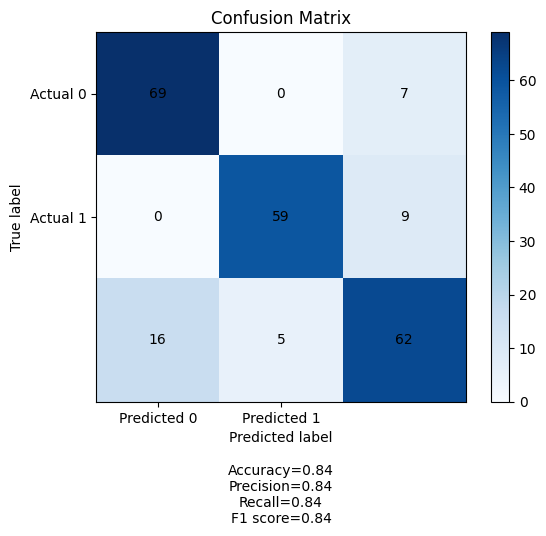

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
cm = confusion_matrix(y_test, y_pred)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='positive',average='micro')
recall = recall_score(y_test, y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test, y_pred,pos_label='positive',average='micro')

# print("Precision Score : ",precision_score(y_test, y_pred, 
#                                            pos_label='positive',
#                                            average='micro'))
# print("Recall Score : ",recall_score(y_test, y_pred, 
#                                            pos_label='positive',
#                                            average='micro'))

# Plot confusion matrix with values and labels
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label\n\nAccuracy={:.2f}\nPrecision={:.2f}\nRecall={:.2f}\nF1 score={:.2f}'.format(accuracy, precision, recall, f1))
plt.ylabel('True label')

# Add values to confusion matrix
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


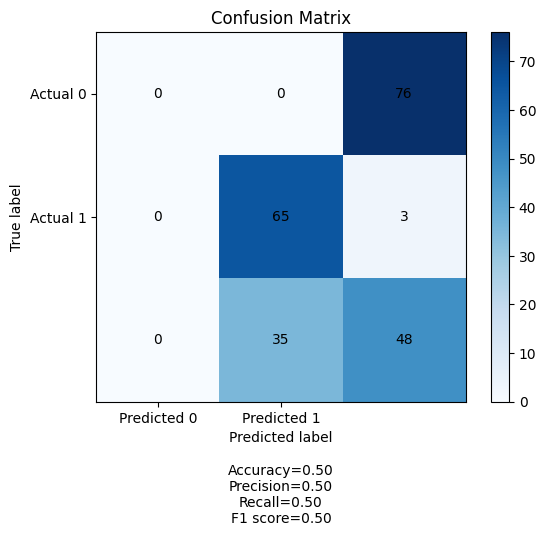

In [ ]:

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
cm = confusion_matrix(y_test, y_pred)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='positive',average='micro')
recall = recall_score(y_test, y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test, y_pred,pos_label='positive',average='micro')

# print("Precision Score : ",precision_score(y_test, y_pred, 
#                                            pos_label='positive',
#                                            average='micro'))
# print("Recall Score : ",recall_score(y_test, y_pred, 
#                                            pos_label='positive',
#                                            average='micro'))

# Plot confusion matrix with values and labels
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label\n\nAccuracy={:.2f}\nPrecision={:.2f}\nRecall={:.2f}\nF1 score={:.2f}'.format(accuracy, precision, recall, f1))
plt.ylabel('True label')

# Add values to confusion matrix
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()


In [ ]:
filename = 'model.pkl'
pickle.dump(knn, open(filename, 'wb'))